In [1]:
%matplotlib inline  
from OpOp.Model import Plummer2D, Plummer, Sersic, Isothermal, Tbetamodel, NFW
from OpOp.Model import NbodyModel, NFWc
from OpOp.analysis import Analysis, Profile
from OpOp.io import write_snap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
label_size =20
mpl.rcParams.update({'figure.autolayout':True})
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['mathtext.default']='regular'
from astropy.constants import G as conG

In [ ]:
(3/(8*np.pi*conG.to('Mpc km2 / (M_sun s2)')))*67*67*1e-9

In [2]:
Mc=5e9
c=None
rt=None
rmin=0.0001
rmax=300
rt=50
nfc=NFWc(Mc,rcore=0.5,c=c,mode='h',  rt=rt, rtnorm=False,c_par=200, z=0, h=0.67, R=None,rini=rmin,rfin=rmax,r_physic=True)
print(nfc)
nf=NFW(Mc,c=c,  rt=rt, rtnorm=False,c_par=200, z=0, h=0.67, R=None,rini=rmin,rfin=rmax,r_physic=True)
print(nf)
rc_halo=nfc.rc
print(nfc.rc)
print(nfc.rcore)


Model: NFWc
core mode:hard
concentration parameter: 200
Cosm parameters,  z:0.000   h:0.670  rhoc:124.552
c: 16.746
M200: 5.000e+09
r200: 36.322
rs: 2.169
rcore: 0.500 (physical)  0.231 (normalised)
rt: 50.000 (physical)  1.377 (normalised)
rini: 0.000 (physical)  0.000 (normalised)
rfin: 300.000 (physical)  138.310 (normalised)
Total Mass: 5.705e+09 at last radius: 300.000
use_c set to False
use_nparray set to False


Model: NFW
concentration parameter: 200
Cosm parameters,  z:0.000   h:0.670  rhoc:124.552
c: 16.746
M200: 5.000e+09
r200: 36.322
rs: 2.169
rt: 50.000 (physical)  1.377 (normalised)
rini: 0.000 (physical)  0.000 (normalised)
rfin: 300.000 (physical)  138.310 (normalised)
Total Mass: 5.693e+09 at last radius: 300.000
use_c set to False
use_nparray set to False

2.16903856912
0.5


/home/ioriosuperstar/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


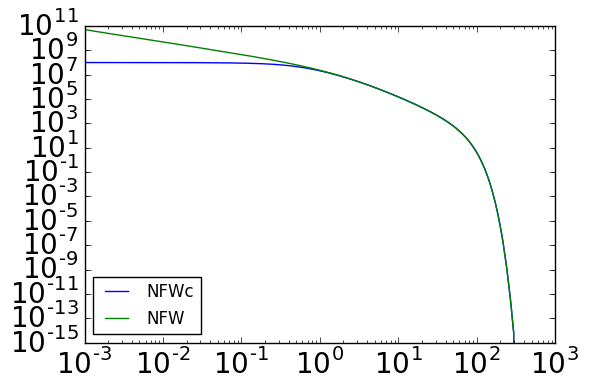

In [3]:
R=np.logspace(np.log10(0.001),np.log10(300),1000)
ynfw=nfc.dens(R)
plt.plot(R,ynfw,label='NFWc')
plt.xscale('log')
plt.yscale('log')
ynfw=nf.dens(R)
plt.plot(R,ynfw,label='NFW')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left')

In [4]:
#s={'type':2,'model':ms, 'npart':int(5e4)}
dm={'type':1, 'model':nfc,'npart':int(1e5)}
a=NbodyModel([dm,],xmin=rmin/rc_halo,xmax=rmax/rc_halo)

In [5]:
p=a.generate(use_c=True, po=None,vo=None,mq=70,set_vel=True)


***Generate ICS: Start***
-Component id:0 type:1 Npart=100000
     Generate Positions:      Done
     Generate Velocities:      Done
     Done in 0.221


/Users/Giuliano/anaconda/envs/py33/lib/python3.3/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Giuliano/anaconda/envs/py33/lib/python3.3/site-packages/numpy/core/_methods.py:95: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Giuliano/anaconda/envs/py33/lib/python3.3/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


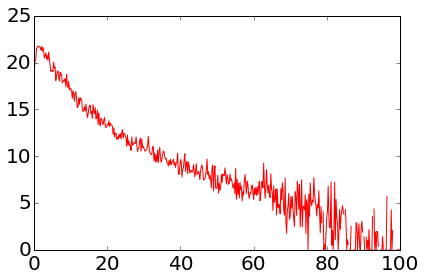

In [6]:
aa=Analysis(p,safe=False,auto_centre=True)
prof=Profile(p,xmin=0.0001,xmax=100,ngrid=512,kind='lin',type=1)
arr=prof.vdisp2d(pax='x',ret=True,func=True,s=None)[0]
r=arr[:,0]
vd=arr[:,1]
plt.plot(r,vd,label='Vdx 2D',c='red')


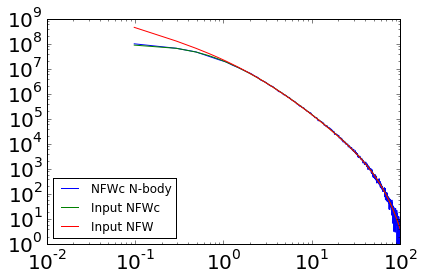

In [9]:
arr=prof.dens()[0]
plt.plot(arr[:,0],arr[:,1],label='NFWc N-body')
y=nfc.dens(arr[:,0])
plt.plot(arr[:,0],y,label='Input NFWc')
y=nf.dens(arr[:,0])
plt.plot(arr[:,0],y,label='Input NFW')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left')